In [1]:
!pip install langgraph langchain_openai langchain_core

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model=os.getenv("OPENAI_DEFAULT_MODEL"))

In [3]:
def call_llm(message):
    return llm.invoke(message)

In [4]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(object)
# Add the nodes
workflow.add_node("call_llm", call_llm)

# Add the Edges
workflow.add_edge(START, "call_llm")
workflow.add_edge("call_llm", END)

#Compile the workflow
app = workflow.compile()


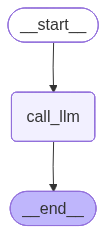

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
response = app.invoke("안녕?")
print(response.content)

안녕하세요! 어떻게 도와드릴까요?
